# Optical-Bloch Equations
In this document, we write down and solve a two-level optical bloch equation.
## Bloch Equations
We can write the Schrodinger equation in the form of the Bloch vector as
$$\partial_t\langle \sigma_x \rangle = \Delta \langle \sigma_y \rangle$$

$$\partial_t\langle \sigma_y \rangle = -\Delta \langle \sigma_x \rangle - \Omega \langle \sigma_z \rangle$$

$$\partial_t\langle \sigma_z \rangle = \Omega \langle \sigma_y \rangle$$

where the Bloch vector is defined as $\langle \sigma \rangle = \langle \sigma_x \rangle \hat{x}+ \langle \sigma_y \rangle \hat{y}+\langle \sigma_z \rangle \hat{z}$. For a pure state, we have 

$$|\langle \sigma \rangle|^2=1$$

## Optical Bloch Equations
We can include the effects of spontaneous emission to the Bloch equations by adding extra terms:
$$\partial_t \rho_{ee}=-\Gamma \rho_{ee}$$

$$\partial_t \rho_{gg}=+\Gamma \rho_{ee}$$

$$\partial_t \tilde{\rho}_{ge}=-\gamma_\perp \tilde{\rho}_{ge}$$

$$\partial_t \tilde{\rho}_{eg}=-\gamma_\perp \tilde{\rho}_{eg}$$

where $\Gamma$ is the longitudinal decay rate and $\gamma_\perp$ is the transverse (dephasing)decay rate. We have 

$$\Gamma = A_{21}$$

$$\gamma_\perp = \Gamma/2 + \gamma_e$$

We can write down the optical bloch equations in the Bloch vector form:

$$\partial_t \langle \sigma_x \rangle = \Delta \langle \sigma_y \rangle -\gamma_\perp \langle \sigma_x \rangle$$

$$\partial_t \langle \sigma_y \rangle = -\Delta \langle \sigma_x \rangle - \Omega \langle \sigma_z \rangle - \gamma_\perp \langle \sigma_y \rangle$$

$$\partial_t \langle \sigma_z \rangle = \Omega \langle \sigma_z \rangle - \Gamma(\langle \sigma_z \rangle +1)$$

And in density matrix form:

$$
\frac{d\rho_{ee}}{dt} = i\frac{\Omega}{2}(\rho_{eg} - \rho_{ge}) - \Gamma\rho_{ee},
$$

$$
\frac{d\rho_{gg}}{dt} = -i\frac{\Omega}{2}(\rho_{eg} - \rho_{ge}) + \Gamma\rho_{ee},
$$

$$
\frac{d\rho_{ge}}{dt} = -(\gamma_{\perp} + i\Delta)\rho_{ge} - i\frac{\Omega}{2}(\rho_{ee} - \rho_{gg}),
$$

$$
\frac{d\rho_{eg}}{dt} = -(\gamma_{\perp} - i\Delta)\rho_{eg} + i\frac{\Omega}{2}(\rho_{ee} - \rho_{gg}).
$$

Below we set up the set of the optical Bloch equation for the case of the single photon excitation of the Rydberg atom.

In [3]:
from arc import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np  # Import Numerical Python
from IPython.display import display, HTML  # Import HTML for formatting output
from scipy.integrate import ode  # Import ODE solver
import scipy.constants as cts  # Import physical constants

We write down the optical Bloch equation in its density matrix form.

In [4]:
# Write down the optical Bloch equations
def optical_bloch_eqs(t,y,Omega, omega, Gamma, Delta, gammaPerp):
    #Omega rabi frequency, omega laser frequency, Gamma decay rate, 
    # Delta detuning, gamma_perp dephasing rate
    
    
    
    rho_gg = y[0]
    rrho_ge = y[1] # rho_ge in the rotating frame
    rrho_eg = y[2] # rho_eg in the rotating frame
    rho_ee = y[3]

    drho_eedt = 1j*Omega/2*(rrho_eg - rrho_ge) - Gamma*rho_ee
    drho_ggdt = -1j*Omega/2*(rrho_eg- rrho_ge) + Gamma*rho_ee
    drrho_gedt = -(gammaPerp + 1j*Delta)*rrho_ge  - 1j*Omega/2*(rho_ee-rho_gg)
    drrho_egdt = -(gammaPerp - 1j*Delta)*rrho_eg  + 1j*Omega/2*(rho_ee-rho_gg)
    dydt = [drho_ggdt, drrho_gedt, drrho_egdt, drho_eedt]
    return dydt






We calculate the rabi frequency $\Omega$,  detuning $\Delta$, longitudinal relaxing rate $\Gamma$, and transverse relaxing rate $\gamma_\perp$.

In [5]:
I= 1.2732e5 #Intensity of the laser in W/m^2

a_0 = cts.physical_constants['Bohr radius'][0]  # Bohr radius in meters
e = cts.e  # Electron charge in Coulombs  
hbar = cts.hbar  # Planck's constant divided by 2*pi in J*s 
epsilon = cts.epsilon_0  # Vacuum permittivity in Farads/meter
c = cts.c  # Speed of light in meters/second
E_0 = np.sqrt(2*I/(epsilon*c))  # Strength of the electric field in V/m
print('E_0=' + str(E_0))

E_0=9794.417137948114


In [6]:
# for n=30, Rb
atom = Rubidium()
nf = 52 # principal quantum number of the final state
# Get the dipole matrix element in units of a_0e
n1 = 5
l1 = 0
j1 = 0.5
mj1 = 0.5
n2 = nf
l2 = 1
j2 = 1.5
mj2 = 1.5
q = 1



d12=atom.getDipoleMatrixElement(n1=n1, l1=l1, j1=j1, mj1=mj1, n2=n2, l2=l2, j2=j2, mj2=mj2,q=q)
print('d12='+ str("{:e}".format(d12)))
# Get the Rabi frequency
Omega=d12*E_0/hbar * a_0*e
print('Omega='+ str("{:e}".format(Omega)))
Omega2 = atom.getRabiFrequency2(n1=n1, l1=l1, j1=j1, mj1=mj1, n2=n2, l2=l2, 
                               j2=j2,q=q, electricFieldAmplitude=E_0
                    )
print('Omega2='+ str("{:e}".format(Omega2)))

# Get the transition frequency
omega_0=atom.getTransitionFrequency(n1=n1, l1=l1, j1=j1, n2=n2, l2=l2, j2=j2)
print('omega_0='+ str("{:e}".format(omega_0)))

# Detuning
m=0
Delta = m*Omega

# Laser frequency
omega = omega_0 + Delta

# Decay rate
Gamma = 1/atom.getStateLifetime(n=nf, l=l2, j=j2)
lifetime = atom.getStateLifetime(n=nf, l=l2, j=j2)
print('Gamma='+ str("{:e}".format(Gamma)))
print('lifetime='+ str("{:e}".format(lifetime)))
# Dephasing rate
gammaPerp = Gamma/2
print('gamma_perp='+ str("{:e}".format(gammaPerp)))

d12=1.813591e-03
Omega=1.428083e+06
Omega2=1.428083e+06
omega_0=1.008674e+15
Gamma=3.374580e+03
lifetime=2.963331e-04
gamma_perp=1.687290e+03


In [7]:
# Solve the ODE
t=np.linspace(0,120*np.pi/Omega,10000)
r=ode(optical_bloch_eqs).set_integrator('zvode')
y0 = [1,0,0,0]
r.set_initial_value(y0).set_f_params(Omega, omega, Gamma, Delta, gammaPerp)
# Store the value
rho_gg = np.zeros(len(t), dtype=complex)
rrho_ge = np.zeros(len(t), dtype=complex)
rrho_eg = np.zeros(len(t), dtype=complex)
rho_ee = np.zeros(len(t), dtype=complex)
rho_gg[0] = y0[0]
rrho_ge[0] = y0[1]
rrho_eg[0] = y0[2]
rho_ee[0] = y0[3]

#integration
for i in range(1,len(t)):
    r.integrate(t[i])

    rho_gg[i] = r.y[0]
    rrho_ge[i] = r.y[1]
    rrho_eg[i] = r.y[2]
    rho_ee[i] = r.y[3]




c:\Users\Chen\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


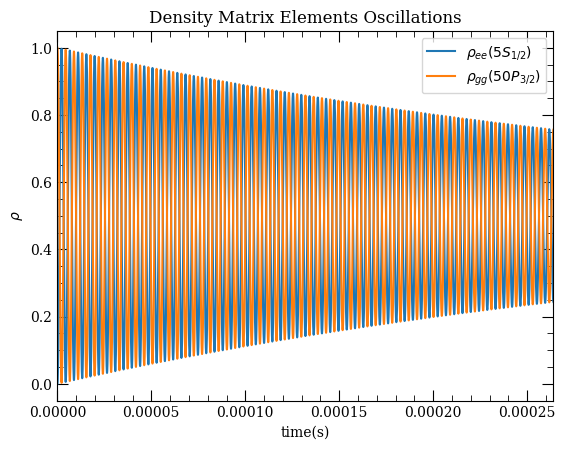

In [8]:
# Plot the results
fig, ax = plt.subplots()
ax.set_xlim(0*np.pi/Omega,120*np.pi/Omega)
plt.plot(t,rho_ee,label=r'$\rho_{ee}(5S_{1/2})$')
plt.plot(t,rho_gg,label=r'$\rho_{gg}(50P_{3/2})$')
plt.xlabel('time(s)')
plt.ylabel(r'$\rho$')
plt.title('Density Matrix Elements Oscillations')

plt.legend()
plt.show()

We can also plot the polarizibility of the Rydberg atom versus time.

In [9]:
alpha = - 3*2*np.pi*c**2/omega**2 * Gamma/Omega*np.imag(rrho_eg)

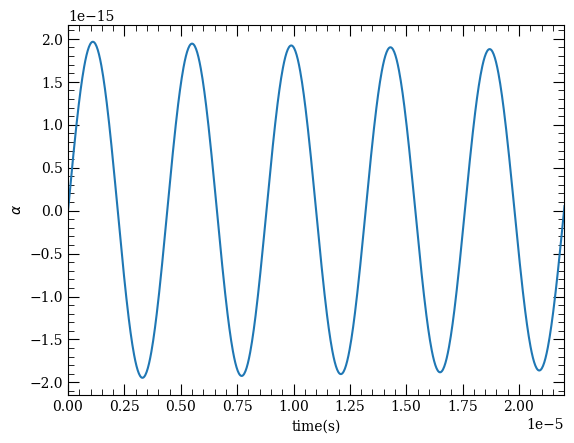

In [10]:
# Plot the results
fig, ax = plt.subplots()
ax.set_xlim(0*np.pi/Omega,10*np.pi/Omega)
plt.plot(t,alpha,label=r'$\alpha$')
plt.xlabel('time(s)')
plt.ylabel(r'$\alpha$')

plt.show()